<a href="https://colab.research.google.com/github/SubhrajeetGhose/DeepLearning-CampusX/blob/main/RNN_Embedding_Sentiment_Analysis_Simplernn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding Example with mock dataset

In [ ]:
docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(docs)

In [ ]:
len(tokenizer.word_index)

17

In [ ]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[9, 1],
 [1, 1],
 [3, 3, 10],
 [2, 11, 2, 1, 2],
 [12, 13, 4, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [14, 15, 4, 5],
 [16, 17]]

In [ ]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences

array([[ 9,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 3,  3, 10,  0,  0],
       [ 2, 11,  2,  1,  2],
       [12, 13,  4,  5,  0],
       [ 6,  6,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [14, 15,  4,  5,  0],
       [16, 17,  0,  0,  0]], dtype=int32)

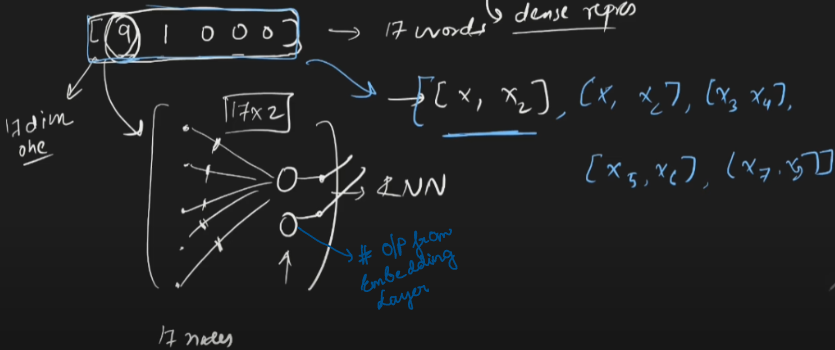

In [ ]:
 model = Sequential()
model.add(Embedding(17,output_dim=2,input_length=5))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 5, 2)              34        
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile('adam','accuracy')

In [ ]:
pred = model.predict(sequences)
print(pred)

1/1 [==============================] - 0s 15ms/step
[[[-0.03378457 -0.0223366 ]
  [-0.01869411  0.0397962 ]
  [ 0.04738592  0.03497881]
  [ 0.04738592  0.03497881]
  [ 0.04738592  0.03497881]]

 [[-0.01869411  0.0397962 ]
  [-0.01869411  0.0397962 ]
  [ 0.04738592  0.03497881]
  [ 0.04738592  0.03497881]
  [ 0.04738592  0.03497881]]

 [[ 0.00716299  0.02782274]
  [ 0.00716299  0.02782274]
  [-0.02727993 -0.02907238]
  [ 0.04738592  0.03497881]
  [ 0.04738592  0.03497881]]

 [[ 0.04634063 -0.01492285]
  [ 0.04544855 -0.02214533]
  [ 0.04634063 -0.01492285]
  [-0.01869411  0.0397962 ]
  [ 0.04634063 -0.01492285]]

 [[ 0.03687553  0.00542127]
  [ 0.00882751  0.02693466]
  [ 0.00960891 -0.02113671]
  [-0.01385436  0.00159916]
  [ 0.04738592  0.03497881]]

 [[ 0.04272473 -0.02110641]
  [ 0.04272473 -0.02110641]
  [ 0.04738592  0.03497881]
  [ 0.04738592  0.03497881]
  [ 0.04738592  0.03497881]]

 [[ 0.01033523 -0.02812191]
  [ 0.01033523 -0.02812191]
  [ 0.04738592  0.03497881]
  [ 0.047385

# IMDB Dataset

In [ ]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

In [ ]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [ ]:
X_train.shape

(25000, 50)

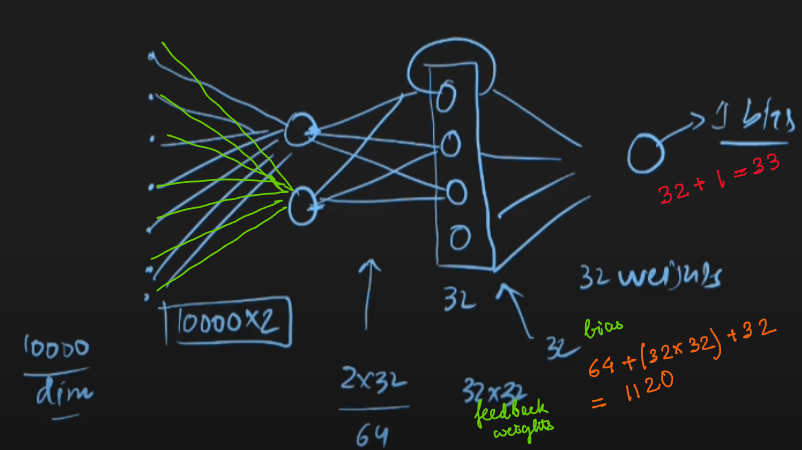

In [ ]:
model = Sequential()
model.add(Embedding(10000, 2,50))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 2)           20000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1120      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,153
Trainable params: 21,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 [==============================] - 40s 50ms/step - loss: 0.5801 - acc: 0.6731 - val_loss: 0.4433 - val_acc: 0.7978
Epoch 2/5
782/782 [==============================] - 39s 50ms/step - loss: 0.3524 - acc: 0.8510 - val_loss: 0.4430 - val_acc: 0.8051
Epoch 3/5
782/782 [==============================] - 39s 50ms/step - loss: 0.2040 - acc: 0.9224 - val_loss: 0.5460 - val_acc: 0.7828
Epoch 4/5
782/782 [==============================] - 38s 49ms/step - loss: 0.0823 - acc: 0.9735 - val_loss: 0.6990 - val_acc: 0.7824
Epoch 5/5
782/782 [==============================] - 38s 49ms/step - loss: 0.0352 - acc: 0.9894 - val_loss: 0.8774 - val_acc: 0.7670
